Description
---------

This is an instance of Bayesian inference. Explicitly, we try to do a linear fitting by means of Bayesian inferenace. 

This instance is a reduced version of the instance in section 1.2.5 in _Bayesian Learning for Neural Networks_.


Basics
------

### Bayes Rule

    prob(new_event | old_events) = sum([prob(new_event | parameters) * prob(paramters | old_events)
                                        for parameters in all_possible_parameters
                                        ])

where
        
    prob(paramters | old_events) = prob(old_events | paramters) * prob(parameters) / prob(old_events)
    

### Terminality

Prior:
    
    prob(parameters)
    
Posterior:
    
    prob(paramters | old_events)
    
Likelihood:
    
    prob(old_events | parameters)
    

### Gaussian Instance

If, for any event, there exists some `f: (float -> float)` and some `sigma: float`, s.t.
    
    prob(element | parameters) = gauss(f(parameters), sigma, element)
    
then,
    
    expect(new_event) = sum([f(parameters) * prob(paramters | old_events)
                             for parameters in all_possible_parameters
                             ])

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

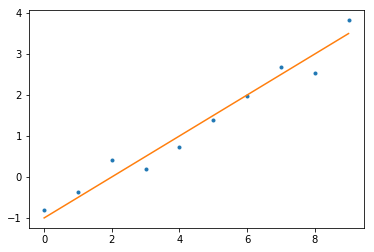

In [2]:
a = 0.5
b = -1
target = lambda x: a * x + b


xs = np.arange(0, 10, 1)
ys = [target(x) + random.gauss(0, 0.3) for x in xs]

plt.plot(xs, ys, '.')
plt.plot(xs, [target(x) for x in xs])
plt.show()

In [3]:
def f(parameters, x):
    """ 
    Args:
        parameters: [a: float, b: float]
        x: float
        
    Returns:
        float
    """
    a = parameters[0]
    b = parameters[1]

    return a * x + b


def gauss(mu, sigma, x):
    """
    Args:
        mu: float
        sigma: float
        x: float
        
    Returns:
        float
    """
    return np.sqrt(2 * np.pi * sigma) * np.exp((-1/2) * ((x - mu) / sigma) ** 2)


def likelihood(ys, parameters, xs, sigma=0.1):
    """
    Args:
        ys: [y: float]
        parameters: [a: float, b: float]
        xs: [x: float]
        
    Returns: float
    """
    
    def single_prob(y, parameters, x):
        """
        Args:
            y: float
            parameters: [a: float, b: float]
            x: float

        Returns: float
        """
        return gauss(f(parameters, x), sigma, y)

    return np.prod([single_prob(ys[i], parameters, xs[i])
                    for i in range(len(xs))
                   ])


def prior(parameters):
    """
    Args:
        parameters: [a: float, b: float]
        
    Returns:
        float
    """
    return 1




def normalize_factor(parameters, ys, xs):
    """
    Args:
        paramters: [a: float, b: float]
        ys: [y: float]
        xs[x: float]
        
    Returns:
        float
    """
    normalize_factor = sum([unnormalized_posterior(parameters, ys, xs)
                            for parameters in all_possible_parameters
                            ])
    

def posterior(parameters, ys, xs):
    """
    Args:
        paramters: [a: float, b: float]
        ys: [y: float]
        xs[x: float]
        
    Returns:
        float
    """
    
    def unnormalized_posterior(parameters):
        return likelihood(ys, parameters, xs) * prior(parameters)
    
    N = sum([unnormalized_posterior(parameters)
            for parameters in all_possible_parameters
            ])
    normalize_factor = 1 / N
    
    return normalize_factor * unnormalized_posterior(parameters)


def expect(new_x, all_possible_parameters, ys, xs):
    """
    Args:
        new_x: float
        all_possible_parameters: [parameters: [a: float, b: float]]
        ys: [y: float]
        xs: [x: float]
        
    Returns:
        float
    """
    
    return sum([f(parameters, new_x) * posterior(parameters, ys, xs)
                for parameters in all_possible_parameters
               ])

In [4]:
all_possible_parameters = [[a, b] for a in np.arange(-1, 1, 0.1) for b in np.arange(-1, 1, 0.1)]

In [5]:
new_x = 12
expect_y = expect(new_x, all_possible_parameters, ys, xs)


plt.plot(xs, ys, '.')
plt.plot(np.arange(0, new_x + 1),
         [target(x) for x in np.arange(0, new_x + 1)]
        )
plt.plot([new_x], [expect_y], 'ro')
plt.show()

NameError: name 'y' is not defined